# Experiment 7 : Grow of stables attractors fields in Aleatory CBN with diferents number of edges

This experiment explore the growth of local networks in CBN with Aleatory topology. Its important see what happened with the Linear CBN with more edges

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("outputs/exp7_data_3_8_10/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## Basics Estatistics

In [52]:
# Select the required columns and create a new DataFrame
df_resume = df[['n_local_networks', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
df_resume.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,210.000000,210.000000,210.000000,210.000000
mean,5.952381,28.342857,103.142857,2550.109524
std,1.650756,14.244501,128.360171,10264.921471
min,3.000000,6.000000,2.000000,0.000000
25%,5.000000,18.000000,15.000000,1.000000
50%,6.000000,25.500000,51.500000,3.000000
75%,7.000000,36.000000,151.500000,729.000000
max,8.000000,72.000000,652.000000,66561.000000


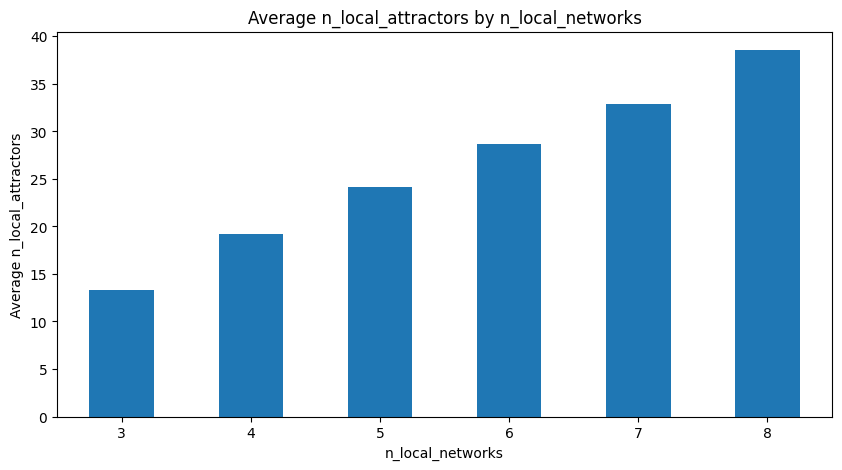

In [53]:
# Group by 'n_local_networks' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_local_networks')['n_local_attractors'].mean()

# Crear el gráfico de barras con escala logarítmica en el eje y y tamaño ajustado
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura (ancho, alto)

# Create the histogram
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_local_attractors by n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_local_attractors')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

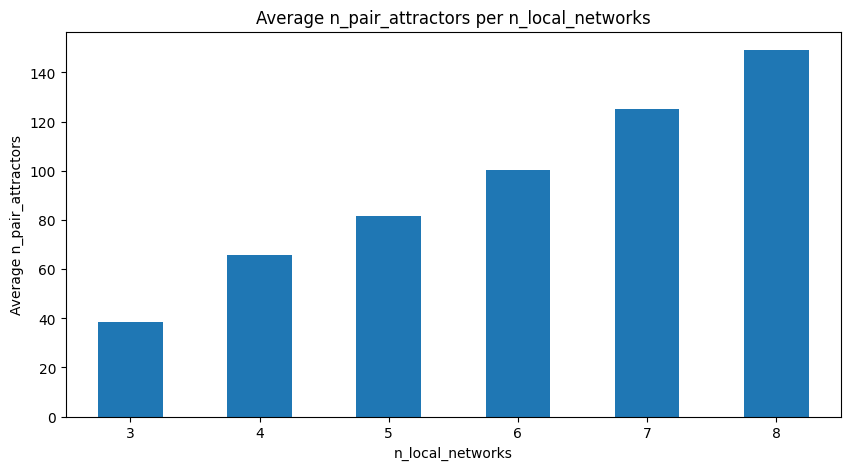

In [54]:
# Group by 'n_local_networks' and calculate the mean of 'n_pair_attractors'
grouped_data = df.groupby('n_local_networks')['n_pair_attractors'].mean()

# Crear el gráfico de barras con escala logarítmica en el eje y y tamaño ajustado
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura (ancho, alto)

# Create the bar plot with different colors for each column
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_pair_attractors per n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_pair_attractors')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()
                

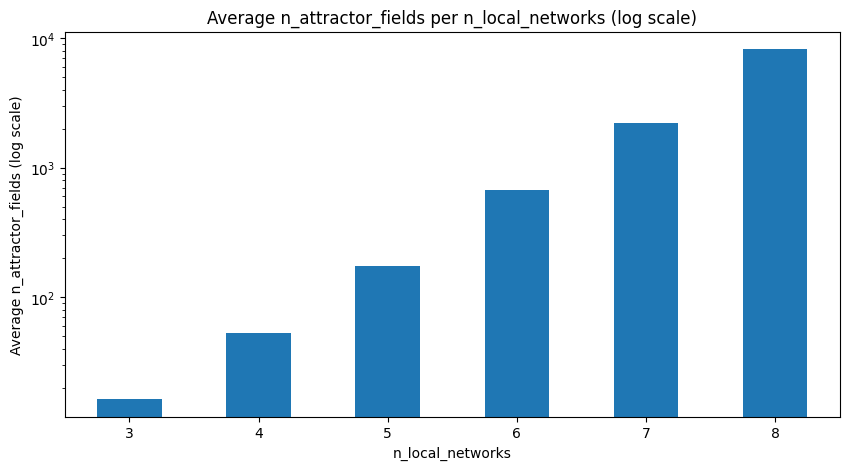

In [55]:
# Group by 'n_local_networks' and calculate the mean of 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Crear el gráfico de barras con escala logarítmica en el eje y y tamaño ajustado
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura (ancho, alto)
# Create the bar plot with logarithmic scale on the y-axis and different colors
grouped_data.plot(kind='bar', logy=True)

# Customize the plot
plt.title('Average n_attractor_fields per n_local_networks (log scale)')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_attractor_fields (log scale)')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

## Advanced Statistics

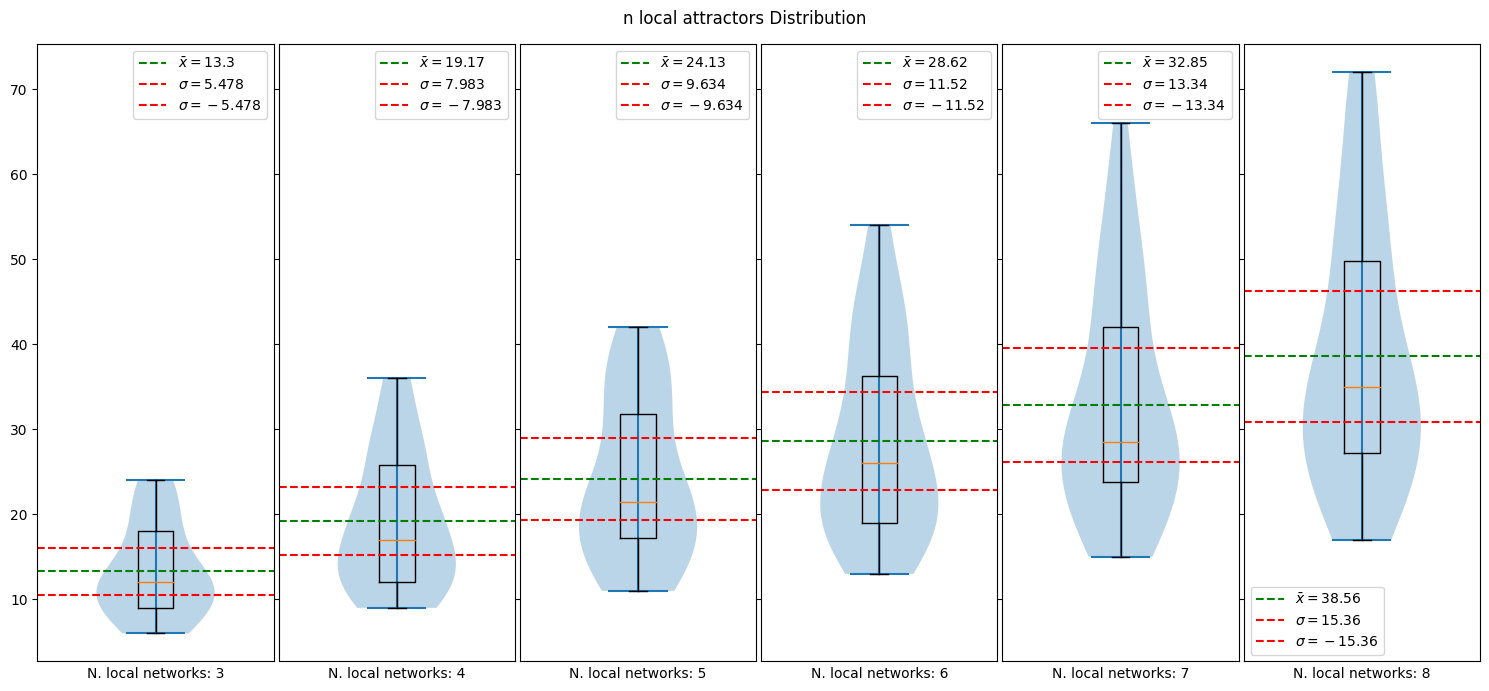

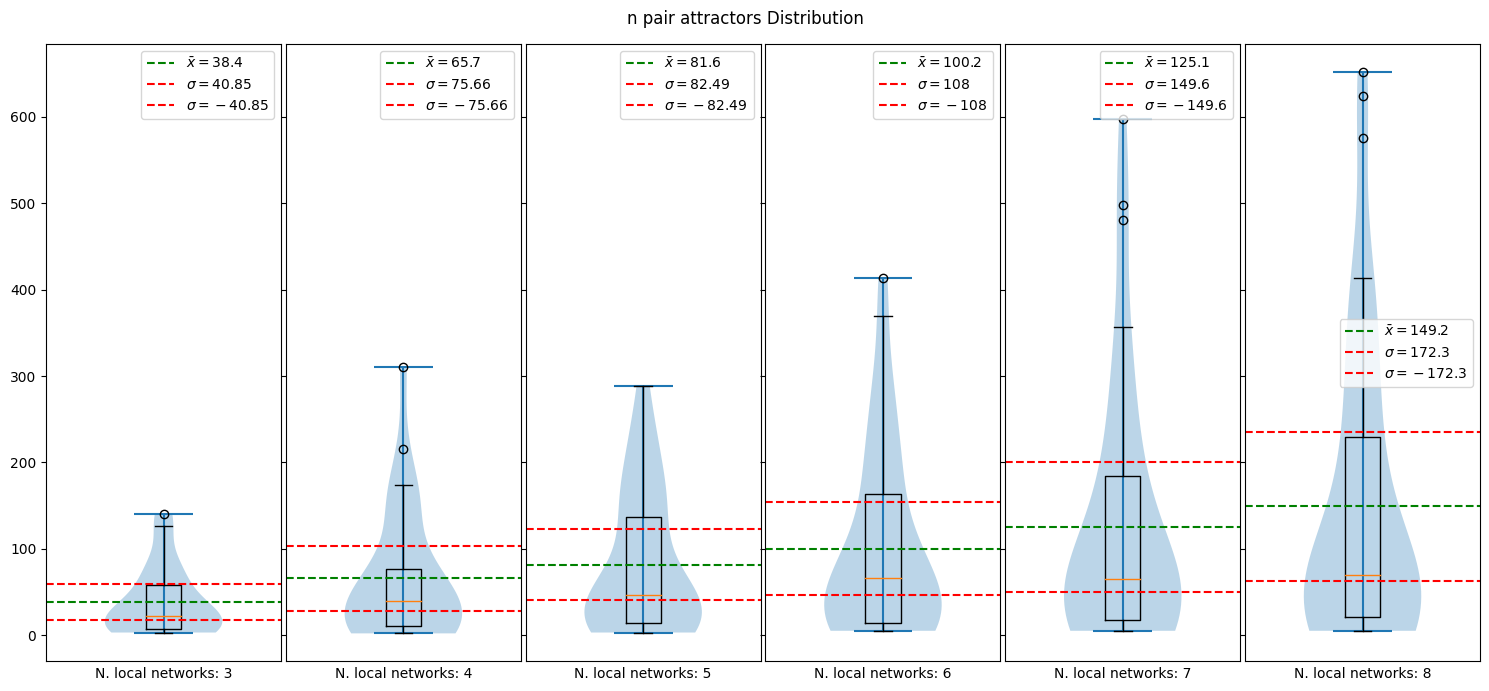

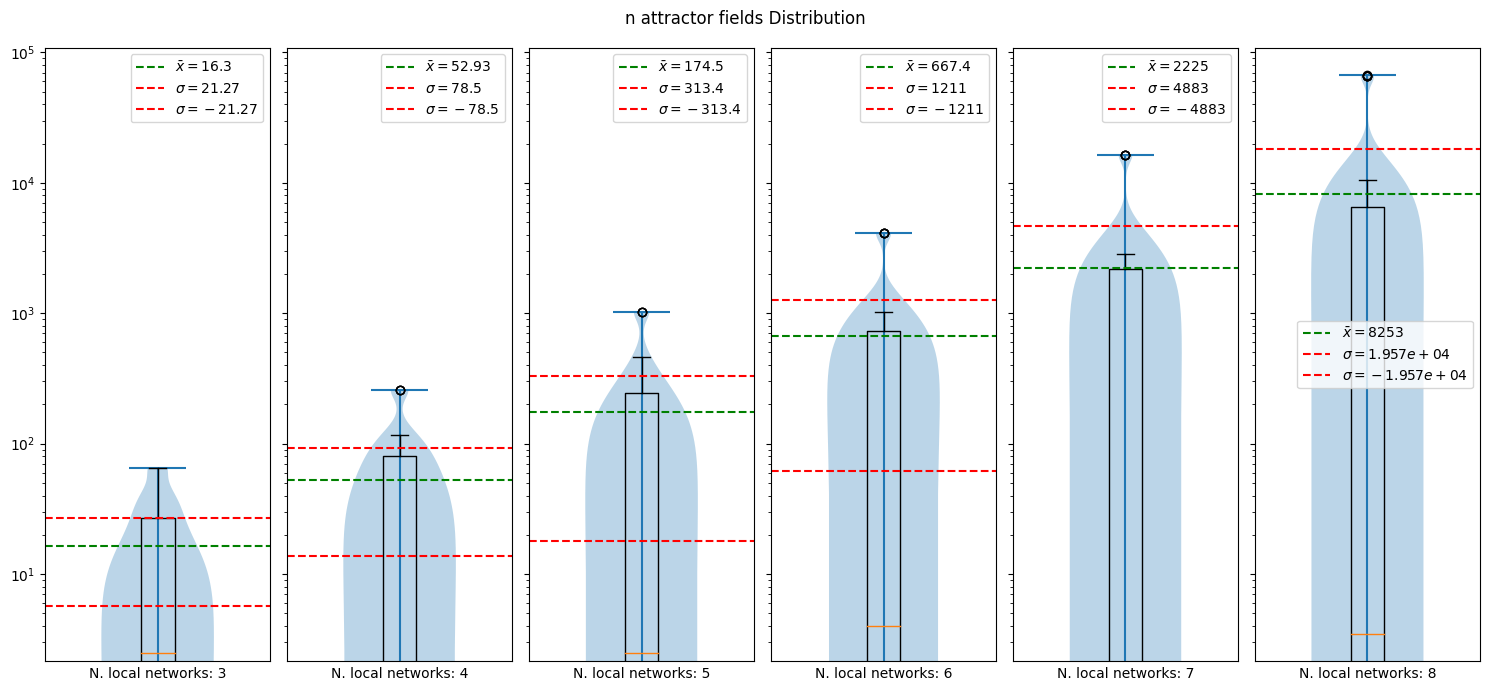

In [56]:
# Obtain the last three unique values of n_local_networks
n_local_networks_unique = df_resume['n_local_networks'].unique()
# n_local_networks_last_three = sorted(n_local_networks_unique)[-3:]
n_local_networks_last_three = sorted(n_local_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

for attribute in attributes:
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_resume[df_resume['n_local_networks'] == n_networks][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev/2, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev/2, color='r', ls='--', label=fr'$\sigma=-{std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Apply log scale only on the last attribute
            axs[i].set_yscale('log')

    fig.suptitle(f'{attribute.replace("_", " ")} Distribution')
    fig.tight_layout(w_pad=0)

plt.show()

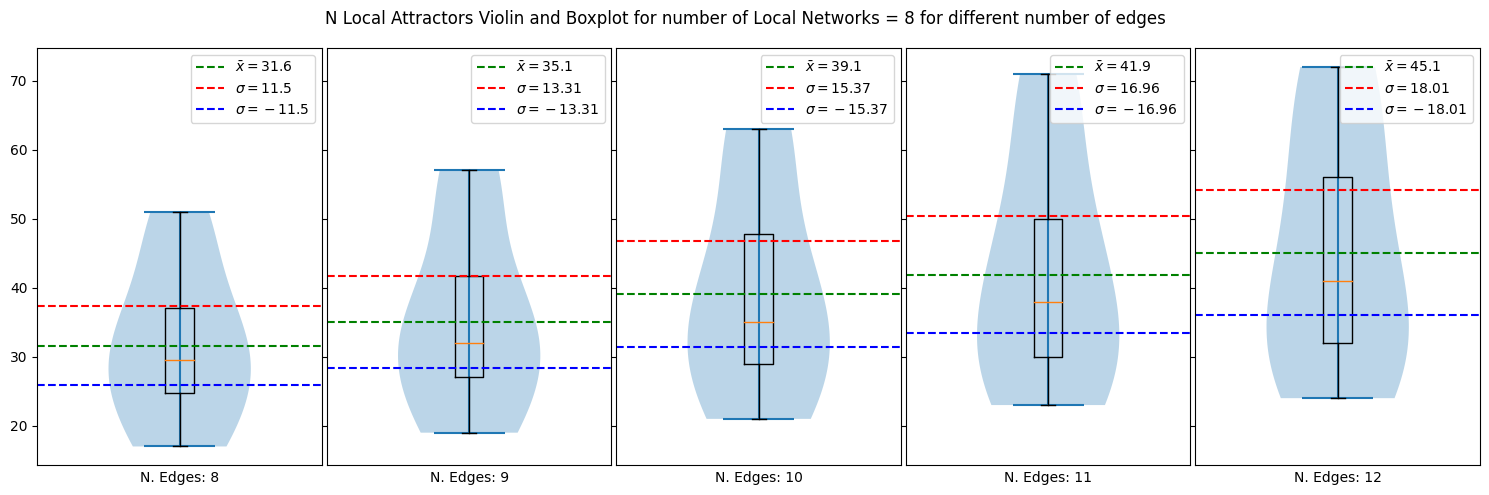

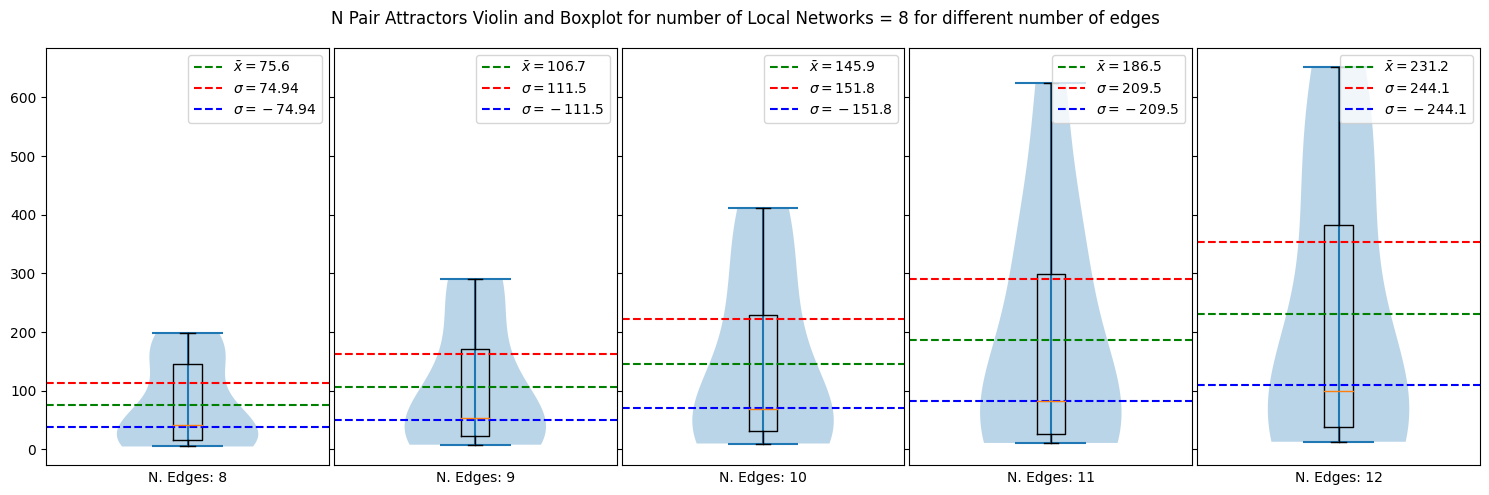

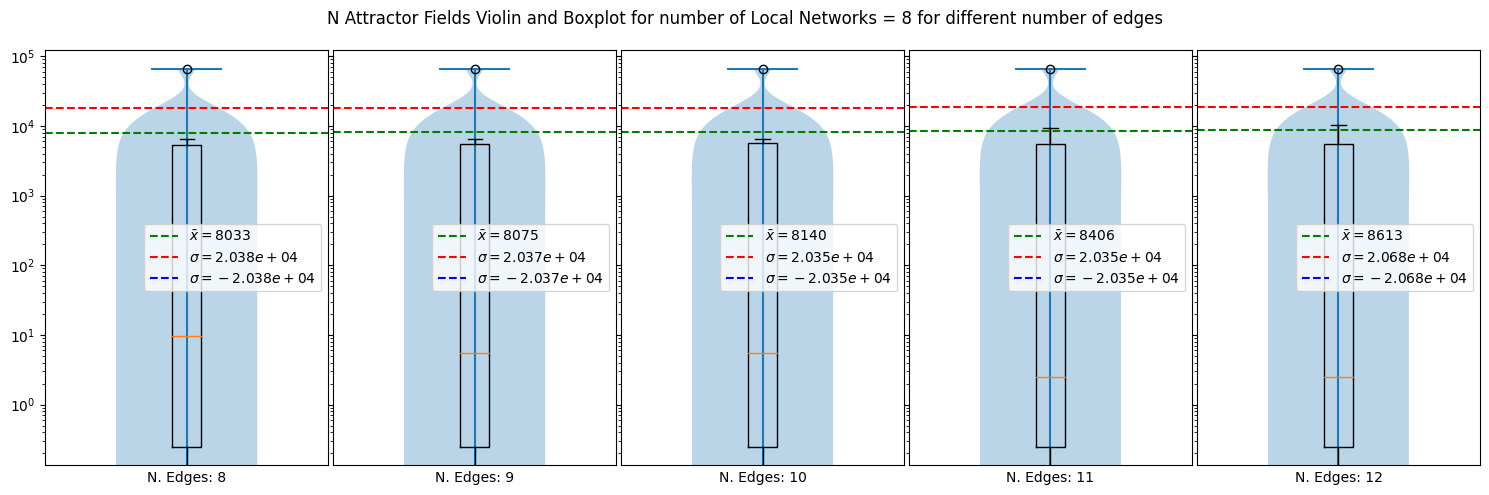

In [57]:
import matplotlib.pyplot as plt

# select the number of networks to be analized
n_local_network = 8

# Filtrar el DataFrame para n_local_networks
filtered_df = df[(df['n_local_networks'] == n_local_network)]

# Atributos para los cuales se generarán los gráficos
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

# Obtener los valores únicos de n_edges
edges_unique = sorted(filtered_df['n_edges'].unique())

for attribute in attributes:
    fig, axs = plt.subplots(1, len(edges_unique), sharey=True, figsize=(15, 5))

    for i, n_edges in enumerate(edges_unique):
        data = filtered_df[filtered_df['n_edges'] == n_edges][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data, widths=0.1)
        axs[i].set_xlabel(f'N. Edges: {n_edges}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev/2, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev/2, color='b', ls='--', label=fr'$\sigma=-{std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Aplicar escala logarítmica solo en el último atributo
            axs[i].set_yscale('log')

    # Reemplazar guiones bajos por espacios y formatear el título
    title = f'{attribute.replace("_", " ").title()} Violin and Boxplot for number of Local Networks = {n_local_network} for different number of edges'
    fig.suptitle(title)
    fig.tight_layout(w_pad=0)

plt.show()

# Filter by local network number

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'df' es tu DataFrame

# Define el network objetivo y los valores de n_edges con los que se compararán
target_network = 8  # Network para el cual se obtienen los top 20 n_attractor_fields
edges_to_compare = [8, 9, 10, 11]  # Valores de n_edges con los que se compararán

# Filtra el DataFrame para obtener solo las filas para target network
target_df = df[df['n_local_networks'] == target_network]

# Obtén los top 20 n_attractor_fields para el network objetivo (con n_edges = 9)
top_20_by_n_attractor_fields = target_df[target_df['n_edges'] == 12].nlargest(10, 'n_attractor_fields')

# Ordena los top 20 por 'n_attractor_fields' para asegurar que el orden sea de mayor a menor
top_20_by_n_attractor_fields = top_20_by_n_attractor_fields.sort_values(by='n_attractor_fields', ascending=False)
top_20_samples = top_20_by_n_attractor_fields['i_sample'].tolist()

# Extrae los valores de muestra para los otros valores de n_edges
other_edge_samples = {}
for n_edge in edges_to_compare:
    # Filtra los datos para el n_edge actual
    other_edge_df = target_df[target_df['n_edges'] == n_edge]

    # Filtra para incluir solo las muestras presentes en la referencia
    filtered_edge_df = other_edge_df[other_edge_df['i_sample'].isin(top_20_samples)]

    # Ordena los datos filtrados de acuerdo con el orden de top_20_samples
    filtered_edge_df['i_sample'] = pd.Categorical(filtered_edge_df['i_sample'], categories=top_20_samples, ordered=True)
    filtered_edge_df = filtered_edge_df.sort_values(by='i_sample')

    # Almacena los valores para este n_edge
    other_edge_samples[n_edge] = filtered_edge_df

# Genera el gráfico de comparación
plt.figure(figsize=(12, 8))

# Grafica los puntos de dispersión para el network objetivo (n_edges = 9)
plt.plot(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', linestyle='-', alpha=0.7, label=f'n_edges = 9')
plt.scatter(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', marker='o', alpha=0.7)

# Grafica las líneas y los puntos de dispersión para los otros valores de n_edges
for n_edge, filtered_edge_df in other_edge_samples.items():
    # Obtén el orden de las muestras para el n_edge actual
    edge_order = [top_20_samples.index(sample) + 1 for sample in filtered_edge_df['i_sample']]

    # Grafica la línea
    plt.plot(edge_order, filtered_edge_df['n_attractor_fields'], linestyle='-', alpha=0.7, label=f'n_edges = {n_edge}')

    # Grafica los puntos de dispersión
    plt.scatter(edge_order, filtered_edge_df['n_attractor_fields'], marker='o', alpha=0.7)

# Aplica escala logarítmica al eje y
plt.yscale('log')

# Personaliza el gráfico
plt.title('Comparison of Number of Attractor Fields for Top 20 Samples with n_local_networks = 6')
plt.xlabel('Decrement order of Top 20')
plt.xticks(range(1, 21))  # Establece las marcas del eje x en enteros del 1 al 20
plt.ylabel('Number of Attractor Fields (Log Scale)')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()


## Filter for Local Networks and Number os Edges

In [58]:
n_local_network = 8
n_edges = 12
# Filter by local networks and max edges
filtered_df = df[(df['n_local_networks'] == n_local_network) & (df['n_edges'] == n_edges) ]
# Selecciona las columnas específicas que deseas mantener
filtered_df = filtered_df[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
filtered_df.describe()

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,10.000000,10.00000,10.000000
mean,45.100000,231.20000,8612.600000
std,18.008948,244.09825,20675.599345
min,24.000000,13.00000,0.000000
25%,32.000000,39.00000,0.250000
50%,41.000000,99.50000,2.500000
75%,56.000000,382.00000,5558.000000
max,72.000000,652.00000,66561.000000


In [ ]:
import matplotlib.pyplot as plt

n_local_network = 8

# Filtrar el DataFrame para obtener solo los registros donde n_local_networks = 6
filtered_df = df[df['n_local_networks'] == n_local_network]

# Group by 'n_edges' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_edges = filtered_df.groupby('n_edges')['n_attractor_fields'].nlargest(20).reset_index(level=0)

# Create the bar chart
plt.figure(figsize=(12, 8))

# Iterate over each group and draw the bars only for the top 20 values
for edge, values in top_20_by_edges.groupby('n_edges'):
    plt.bar([f'{edge}'] * len(values), values['n_attractor_fields'], label=f'Edges: {edge}', alpha=0.7)

# Customize the plot
plt.title(f'Top 20 n_attractor_fields by n_edges for n_local_networks = {n_local_network}')
plt.xlabel('Number of Edges')
plt.ylabel('Number of Stable Attractor Fields')
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Edges')

# Show the plot
plt.show()

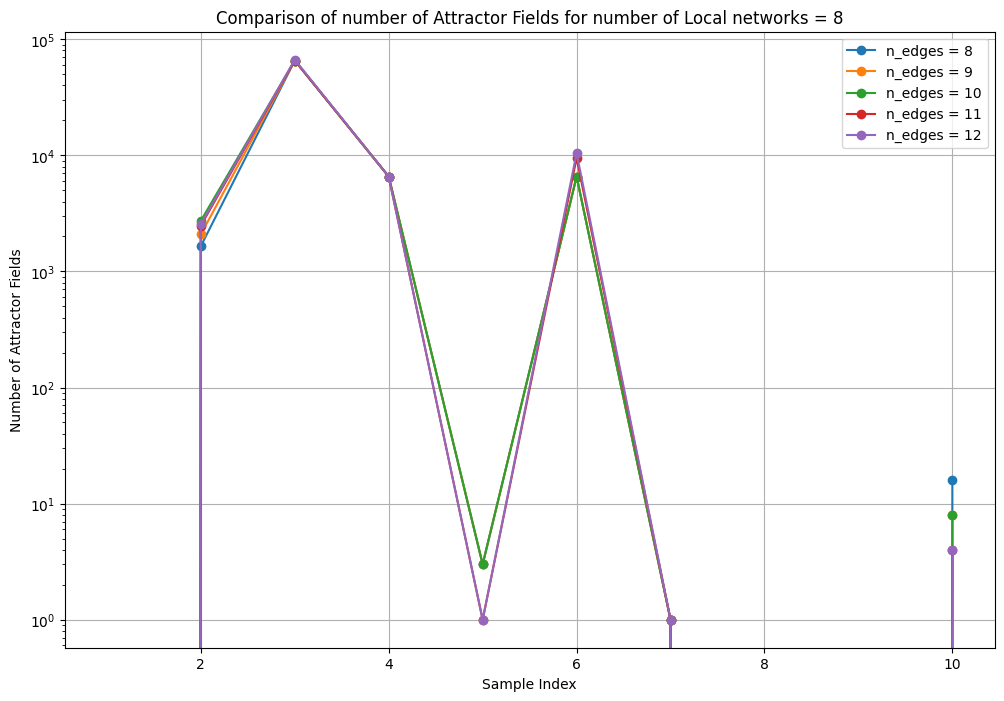

In [59]:
import matplotlib.pyplot as plt

n_local_network = 8
n_edges = 12

# Filtra las filas donde 'n_local_networks' es igual a n_local_network
filtered_df = df[df['n_local_networks'] == n_local_network]

# Obtiene los valores únicos de 'n_edges'
unique_edges = filtered_df['n_edges'].unique()

# Genera el gráfico
plt.figure(figsize=(12, 8))

# Itera sobre cada valor único de 'n_edges' para graficar una línea
for n_edge in unique_edges:
    edge_df = filtered_df[filtered_df['n_edges'] == n_edge]
    plt.plot(edge_df['i_sample'], edge_df['n_attractor_fields'], marker='o', linestyle='-', label=f'n_edges = {n_edge}')

# Añade títulos y etiquetas
plt.title(f'Comparison of number of Attractor Fields for number of Local networks = {n_local_network}')
plt.xlabel('Sample Index')
plt.ylabel('Number of Attractor Fields')
plt.yscale('log') 
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()


### Dispercion Graph

In [ ]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

### Power Law Distribution

In [ ]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()